# Lending Club Case Study

## Team:-
Group Facilitator:- Soumitra Konar    
Team Member:- Sarang Markandey

# Exploratory Data Analysis
Importing all the required Libraries

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

Assigning Dataframe to loan variable

In [316]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1")

In [317]:
loan.shape

(39717, 111)

In [318]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [319]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [320]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning (with respect %)

In [321]:
null_values = round(100*(loan.isnull().sum()/len(loan.id)),2)
null_values

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [322]:
null_values.loc[null_values>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are lot of columns who had 100% missing values, know removing columns with more than 50% missing values

### mths_since_last_delinq  Need to use this for risk factor

In [323]:
null_values.loc[null_values>50]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [324]:
null_values[null_values>= 50].index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

 Droping the column which had more than 50% null values

In [325]:
loan = loan.drop(null_values[null_values>= 50].index,axis=1)
loan.shape

(39717, 54)

In [326]:
null_values = round(100*(loan.isnull().sum()/len(loan.id)),2)
null_values[null_values>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Remove desc column because its shows "Loan description provided by the borrower", this is not required as this is a description

In [327]:
loan = loan.drop('desc',axis=1)
loan.shape

(39717, 53)

In [328]:
null_values = round(100*(loan.isnull().sum()/len(loan.id)),2)
null_values[null_values>0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [329]:
loan.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [330]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [331]:
loan.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [332]:
loan.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [333]:
loan.last_pymnt_d.unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [334]:
loan.last_credit_pull_d.unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [335]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [336]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [337]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [338]:
loan.tax_liens.unique()

array([ 0., nan])

According to above analysis column emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens are the <b>Categorical</b>

collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens range of these columns are 0 and nan which is not significant for the analysis.
Removing these columns

In [339]:
loan = loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1)
loan.shape

(39717, 50)

In [340]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Removing null values from pub_rec_bankruptcies

In [341]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [342]:
null_values = round(100*(loan.isnull().sum()/len(loan.id)),2)
null_values[null_values>0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [343]:
loan.shape

(39020, 50)

Removing null values of emp_title and emp_length

In [344]:
loan = loan[~loan.emp_title.isnull()]
loan = loan[~loan.emp_length.isnull()]

In [345]:
null_values = round(100*(loan.isnull().sum()/len(loan.id)),2)
null_values[null_values>0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Removing null values of title, revol_util and last_pymnt_d

In [346]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [347]:
loan.shape

(36433, 50)

In [348]:
null_values = round(100*(loan.isnull().sum()/len(loan.id)),2)
null_values[null_values>0]

Series([], dtype: float64)

Now we have 36433 rows and 50 attributes left after cleaning data with no null values in it, lets write it into new file and use it for further analysis.

In [349]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

In [350]:
clean_loan = pd.read_csv('clean_loan.csv',encoding='utf-8')

Let's now analyse all the columns in resulted dataframe

In [351]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis.

#### These Column are:
id<br>
member_id<br>
pymnt_plan <br>
url<br>
zip_code <br>
initial_list_status <br>
policy_code <br>
application_type<br>
acc_now_delinq<br>
delinq_amnt 

In [352]:
clean_loan = clean_loan.drop(['id', 'member_id', 'pymnt_plan', 'url', 'zip_code', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'],axis=1)
clean_loan.shape

(36433, 40)

## Updating Data and data types

There are certain columns with need rounding of the values up until two decimal places.

#### These columns are:

total_pymnt<br>
total_rec_late_fee<br>
collection_recovery_fee<br>

In [353]:
clean_loan.total_pymnt.value_counts()

11196.569430    26
11784.232230    16
13148.137860    15
5478.387981     13
10956.775960    13
                ..
26402.662500     1
11055.802500     1
1749.750265      1
19914.641810     1
4278.294070      1
Name: total_pymnt, Length: 34802, dtype: int64

In [354]:
clean_loan.total_rec_late_fee.value_counts()

0.000000     34618
15.000000      224
30.000000       51
15.000000       49
15.000000       42
             ...  
37.323504        1
14.977710        1
14.896508        1
14.971231        1
14.939744        1
Name: total_rec_late_fee, Length: 1194, dtype: int64

In [355]:
clean_loan.collection_recovery_fee.value_counts()

0.0000      33100
1.2000         10
2.0000          9
1.6900          8
2.0200          8
            ...  
1.5778          1
764.7710        1
7.3200          1
10.9890         1
118.1412        1
Name: collection_recovery_fee, Length: 2386, dtype: int64

In [356]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

Now, there are few columns which denote date or month information but are of the type object in the dataframe.
Let's change the dtype of all such columns to datetime.

#### These columns are:

issue_d<br>
earliest_cr_line<br>
last_pymnt_d<br>
last_credit_pull_d<br>

In [357]:
clean_loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [358]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [359]:
clean_loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.1 MB


Next, there are few columns expressing '%' like int_rate and revol_util.<br>
These has values like '25.27%' and '38.04%'. Convert this columns to values without '%' and dtype is float.

In [360]:
clean_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [361]:
clean_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [362]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')

In [363]:
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 569.4 KB


In [364]:
clean_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to the data_dictionary file description for this field,<br>
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
Let's convert the column to have values between 0 and 10.

In [365]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [366]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [367]:
clean_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
removing the months string from within the column term.

In [368]:
clean_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [369]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])

In [370]:
clean_loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

issue_d: The month which the loan was funded .Lets split the available date into month and year column.

In [371]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

In [372]:
del clean_loan['issue_d']

Write the file in new file for further analysis

In [373]:
clean_loan.to_csv('df_final_loan.csv', encoding='utf-8', index=False)

In [374]:
df_final_loan = pd.read_csv('df_final_loan.csv', encoding='utf-8')

# Univariate Analysis

In [375]:
df_final_loan["loan_status"].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [376]:
df_final_loan = df_final_loan[df_final_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
df_final_loan.shape

(35367, 41)

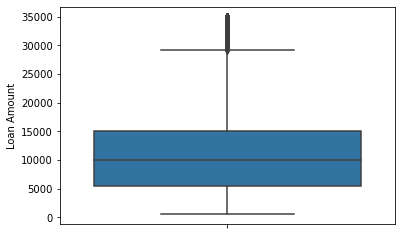

In [377]:
sns.boxplot( y=df_final_loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

<b>Inference:</b> The loan amount varies from 0 to 35,000 having median of 10,000

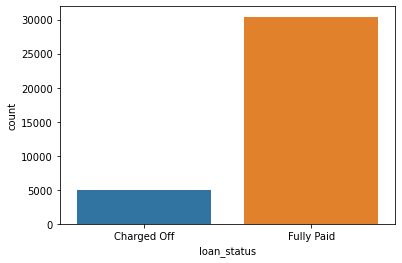

In [378]:
sns.countplot(x= df_final_loan["loan_status"])
plt.show()

<b>Inference:</b><br>
Most of the loans are Fully Paid.<br>
About 14% of loan are having status as defaulters.<br>
We have a class imbalance here.

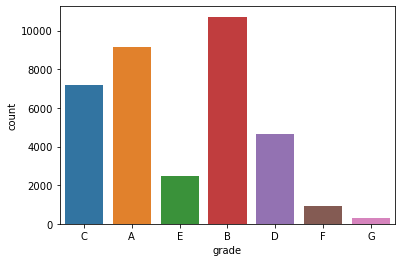

In [379]:
sns.countplot(x='grade', data=df_final_loan)
plt.show()

<b>Inference:</b> Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

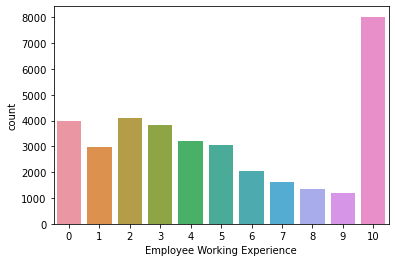

In [380]:
sns.countplot(x='emp_length', data=df_final_loan)
plt.xlabel('Employee Working Experience')
plt.show()

<b>Inference:</b> Majority of employees applying for the loan have more than 10 years of experience

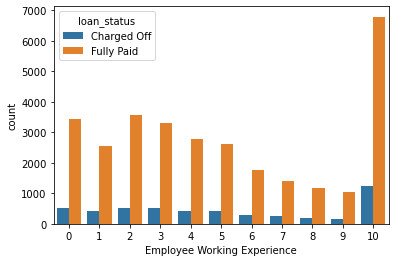

In [381]:
sns.countplot(x='emp_length', hue='loan_status', data=df_final_loan)
plt.xlabel('Employee Working Experience')
plt.show()

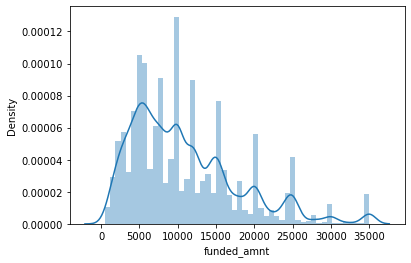

In [382]:
sns.distplot(df_final_loan['funded_amnt'])
plt.show()

<b>Inference:</b> Funded amount is left skewed. Most of the loan amount given is 5 lakhs

In [383]:
df_final_loan['annual_inc_lakhs'] = df_final_loan['annual_inc'] / 1000

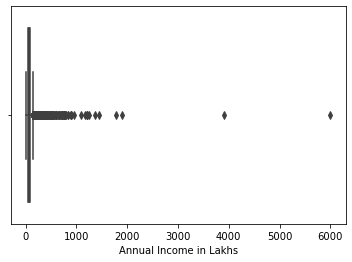

In [384]:
sns.boxplot(x=df_final_loan['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

<b>Inference:</b> There are only two applicants having annual income of more than 30 lakhs

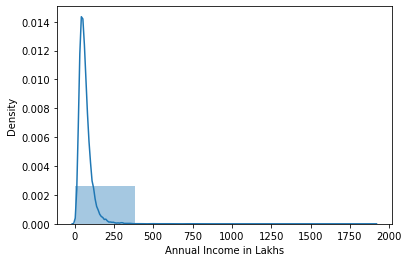

In [385]:
sns.distplot(df_final_loan[df_final_loan['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

<b>Inference:</b> Majority of loan applicants have income less than 5 lakhs

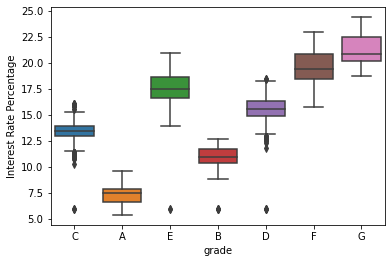

In [386]:
sns.boxplot(y='int_rate', x='grade', data=df_final_loan)
plt.ylabel('Interest Rate Percentage')
plt.show()

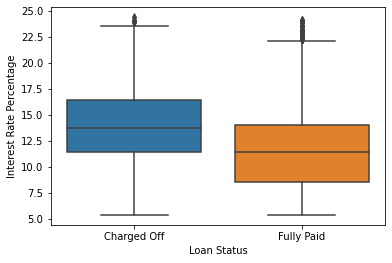

In [387]:
sns.boxplot(y='int_rate', x='loan_status', data=df_final_loan)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

# Segmented Univariate Analysis

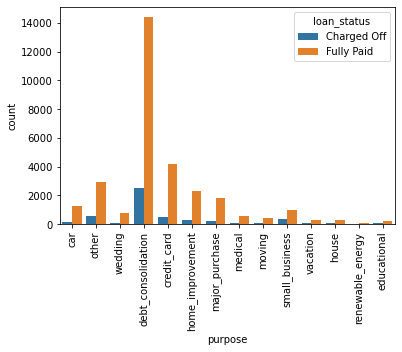

In [388]:
sns.countplot(x='purpose', hue="loan_status", data=df_final_loan)
plt.xticks(rotation=90)
plt.show()

<b>Inference:</b> Majority of loan has been given for the debt consolidation purpose and has been fully paid.

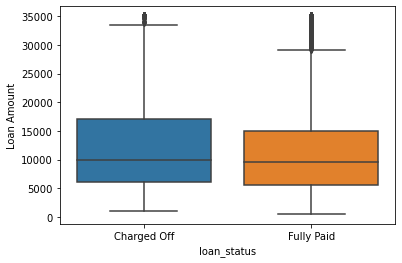

In [389]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df_final_loan)
plt.ylabel('Loan Amount')
plt.show()

<b>Inference:</b> Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

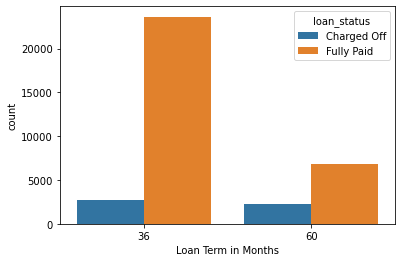

In [390]:
sns.countplot( x="term", hue='loan_status', data=df_final_loan)
plt.xlabel('Loan Term in Months')
plt.show()

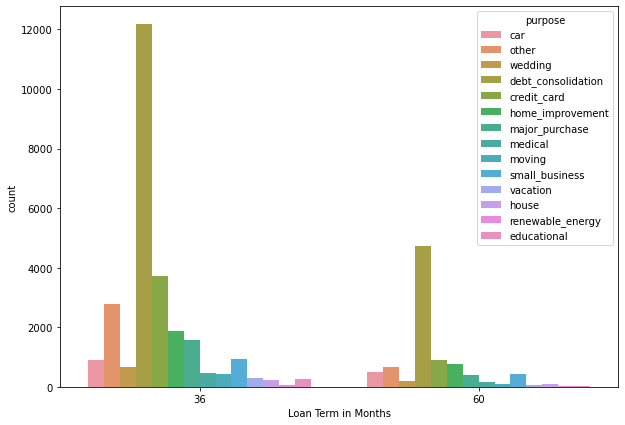

In [391]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df_final_loan)
plt.xlabel('Loan Term in Months')
plt.show()

<b>Inference:</b> Tenure of 36 months have have high chances to be defaulters



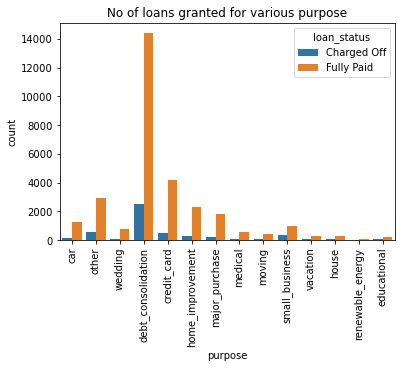

In [392]:
sns.countplot(x='purpose', hue='loan_status', data=df_final_loan)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

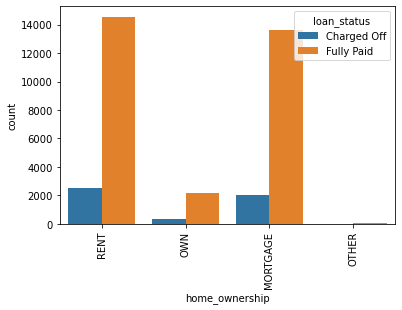

In [393]:
sns.countplot(x='home_ownership',hue='loan_status', data=df_final_loan)
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

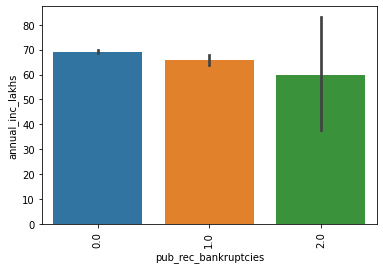

In [394]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df_final_loan)
plt.xticks(rotation=90)
plt.show()

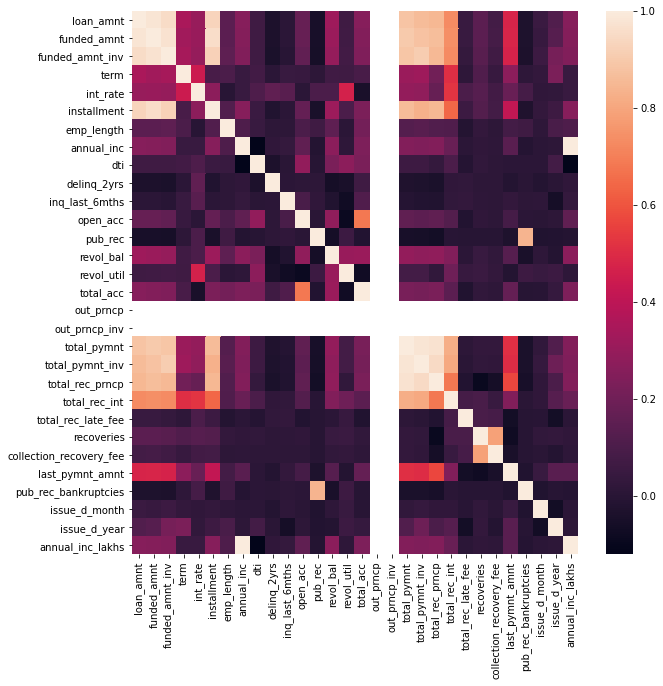

In [395]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final_loan.corr())
plt.show()

In [396]:
del df_final_loan['out_prncp']
del df_final_loan['out_prncp_inv']

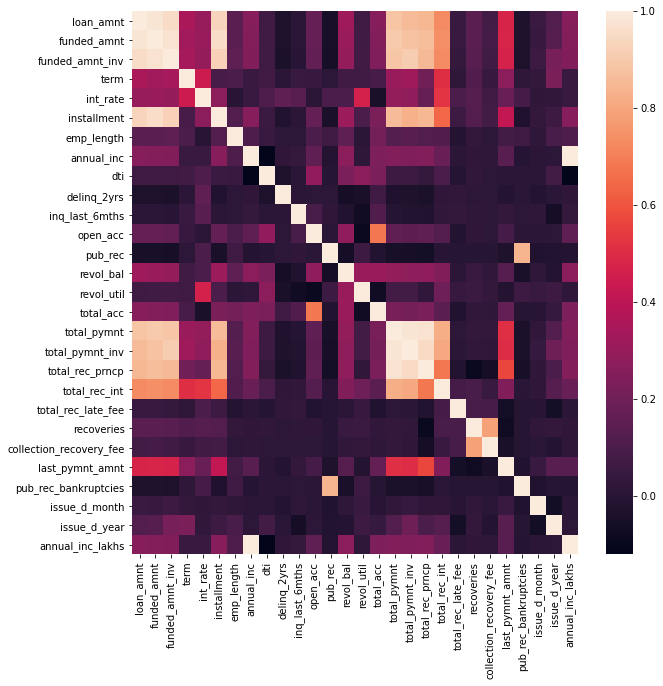

In [397]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final_loan.corr())
plt.show()

In [398]:
numeric_data = df_final_loan.select_dtypes(include = [np.number])
numeric_data.shape

(35367, 28)

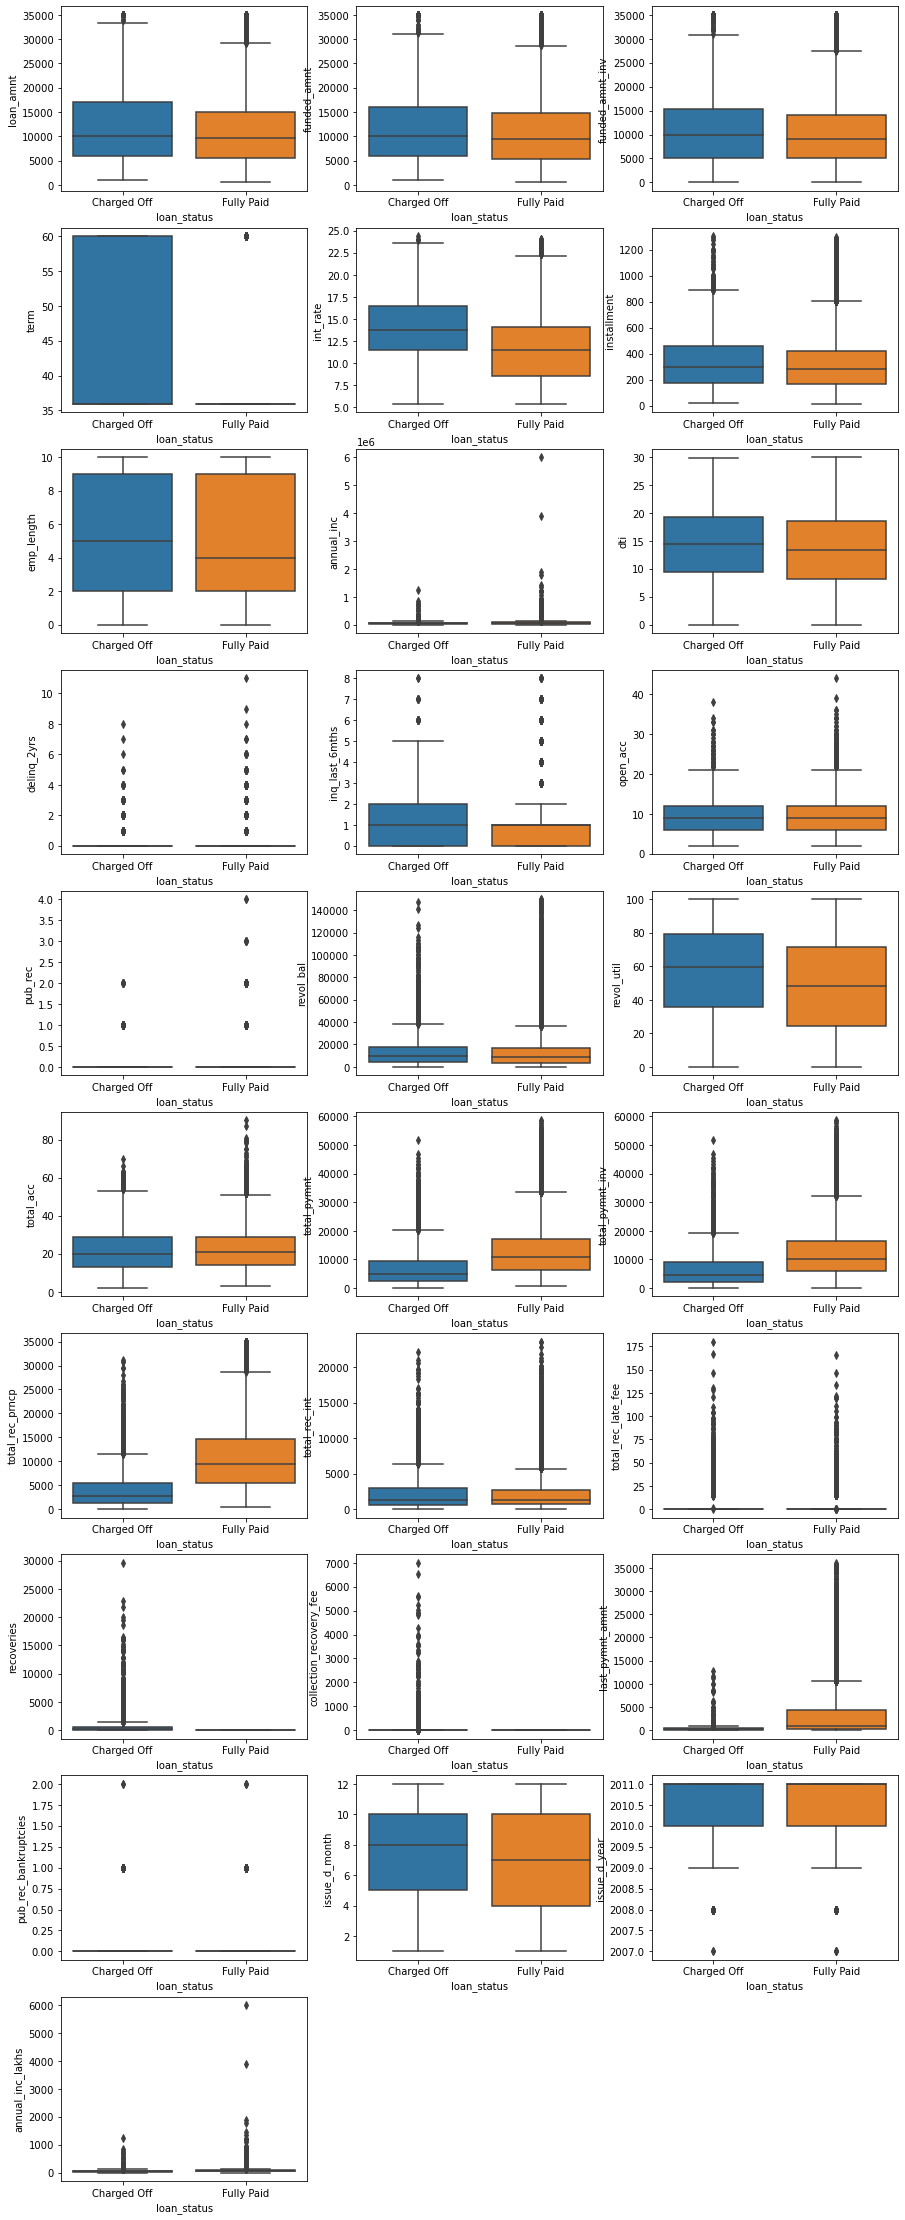

In [399]:
plt.figure(figsize=(15,40))
for i in range(len(numeric_data.columns)):
    plt.subplot(10,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df_final_loan)

plt.show()

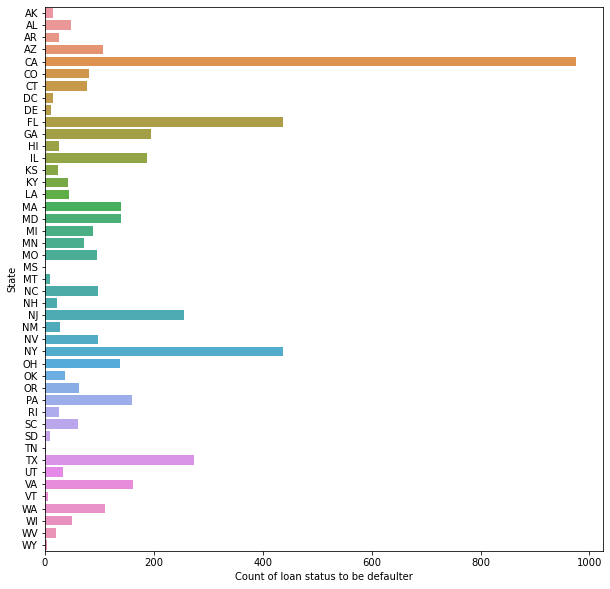

In [400]:
g = df_final_loan[df_final_loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

<b>Inference:</b> Applicants from the state CA are having high probability to be default

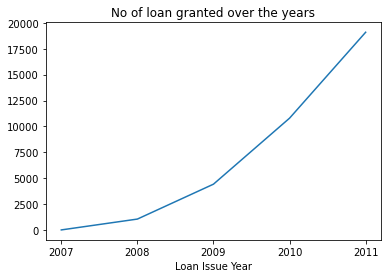

In [401]:
g = df_final_loan.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

<b>Inference:</b> Loan Applicants have been increasing exponentially from year 2007 to 2011

In [402]:
df_final_loan['loan_inc_ratio'] = df_final_loan.funded_amnt*100/df_final_loan.annual_inc

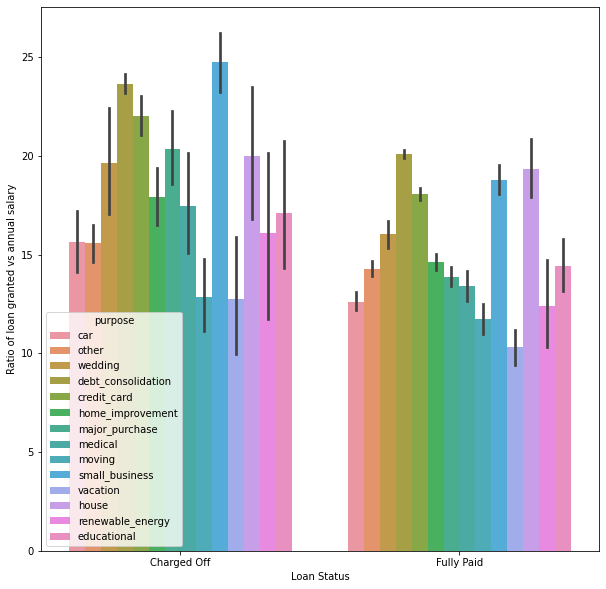

In [403]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df_final_loan)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [404]:
df_agg = df_final_loan[df_final_loan['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

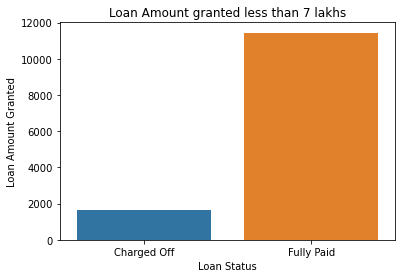

In [405]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [406]:
df_agg = df_final_loan[df_final_loan['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

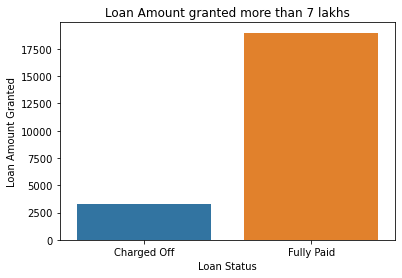

In [407]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()